In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
db_path = "/content/drive/MyDrive/BIO_MEDICAL_PROJECT/obesity_gene_analysis/data/OBESITYGENE_PROJECT.db"

In [106]:
# 비만 유전자 리스트
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG', 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']

이미 SQL에서 데이터프레임으로 값을 가져올 때부터 exp_C_A밖에 선택 안함!

In [107]:
import pandas as pd
import sqlite3

conn = sqlite3.connect(db_path)

# gene_list_str: SQL에서 사용할 수 있게 따옴표 붙여줌
gene_list_str = ','.join([f"'{gene}'" for gene in obesity_genes])

# 쿼리 작성 (f-string으로 포매팅 적용)
query_expr = f"""
SELECT e.ID_REF, e.subject_id, e.exp_C_A, p.gene_symbol
FROM expression_change e
JOIN platform p ON e.ID_REF = p.ID
WHERE p.gene_symbol IN ({gene_list_str})
"""

obesity_genes_expression_change_df = pd.read_sql(query_expr, conn)
obesity_genes_weight_bmi_changes_df = pd.read_sql("SELECT * FROM weight_bmi_changes", conn)

In [6]:
obesity_genes_expression_change_df

,ID_REF,subject_id,exp_C_A,gene_symbol
0,7902074,1,-0.024795,LEPR
1,7916986,1,0.059389,NEGR1
2,7947230,1,-0.525472,BDNF
3,7950307,1,-0.228980,UCP2
4,7995655,1,-0.013301,FTO
...,...,...,...,...
631,8077899,61,0.221693,PPARG
632,8084710,61,-0.082024,ADIPOQ
633,8100085,61,0.189869,GNPDA2
634,8102904,61,0.246989,UCP1


In [13]:
obesity_genes_weight_bmi_changes_df.shape

(53, 13)

In [7]:
obesity_genes_weight_bmi_changes_df

,subject_id,weight_kg_C_A,weight_kg_C_B,weight_kg_B_A,bmi_C_A,bmi_C_B,bmi_B_A,fat_C_A,fat_C_B,fat_B_A,pure_fat_C_A,pure_fat_C_B,pure_fat_B_A
0,1,-9.59,-1.37,-8.22,-3.44,-0.49,-2.95,-7.5,-3.4,-4.1,-9.36066,-2.99932,-6.36134
1,2,-9.97,-0.95,-9.02,-3.70,-0.35,-3.35,-6.2,-2.5,-3.7,-9.05613,-2.18275,-6.87338
2,3,-9.47,2.13,-11.60,-2.97,0.68,-3.65,-6.4,0.3,-6.7,-8.34544,0.70710,-9.05254
3,4,-4.91,0.11,-5.02,-2.07,0.05,-2.12,-2.5,-0.2,-2.3,-4.16890,-0.10224,-4.06666
4,5,-12.65,-0.35,-12.30,-3.95,-0.11,-3.84,-8.9,-1.9,-7.0,-11.63963,-1.68703,-9.95260
5,6,-3.94,1.87,-5.81,-1.57,0.75,-2.32,-2.7,1.4,-4.1,-3.97761,1.90381,-5.88142
6,8,-5.66,0.58,-6.24,-2.08,0.21,-2.29,-6.0,-0.6,-5.4,-6.97032,-0.19890,-6.77142
7,9,-9.94,-0.57,-9.37,-3.46,-0.20,-3.26,-4.5,-1.0,-3.5,-9.40990,-1.16975,-8.24015
8,10,-10.48,-1.02,-9.46,-3.55,-0.35,-3.20,-4.4,-0.2,-4.2,-8.68676,-0.59828,-8.08848
9,11,-9.73,-0.73,-9.00,-3.00,-0.22,-2.78,-6.5,-2.0,-4.5,-8.44394,-1.87934,-6.56460


In [108]:
# 피벗: 세로 = gene, 가로 = subject_id, 값 = 발현량
pivot_obesity_genes_expression_change_df = obesity_genes_expression_change_df.pivot(index="gene_symbol", columns="subject_id", values="exp_C_A")

In [9]:
pivot_obesity_genes_expression_change_df

subject_id,1,10,11,12,13,14,15,18,19,2,...,52,53,54,55,56,59,6,61,8,9
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADIPOQ,-0.196041,0.115678,-0.004271,0.274725,0.381785,-0.224576,NaN,0.267665,0.177774,-0.518054,...,-0.078117,NaN,NaN,-0.115100,0.092120,NaN,-0.049754,-0.082024,0.258315,-0.117022
BDNF,-0.525472,0.129059,-0.415120,0.279586,-0.002045,-0.359239,NaN,-0.093116,-0.112251,-0.098243,...,0.157715,NaN,NaN,0.070600,-0.101401,NaN,0.187668,0.420064,-0.211862,-0.015411
FTO,-0.013301,0.041325,-0.030540,0.121298,0.356442,-0.081788,NaN,0.122677,0.176622,-0.356816,...,-0.357452,NaN,NaN,-0.183659,-0.094094,NaN,-0.225121,0.165903,0.033455,-0.189385
GNPDA2,-0.096386,-0.248120,0.114345,0.539321,0.561500,-0.411572,NaN,0.517616,0.217103,-0.804076,...,-0.396780,NaN,NaN,0.169387,-0.085206,NaN,-0.478120,0.189869,0.124076,-0.397454
LEP,-0.465870,-0.338549,-0.477162,-0.115722,-0.292345,-0.346569,NaN,-0.229164,-0.031183,-0.979490,...,-0.077448,NaN,NaN,-0.509459,0.681304,NaN,-0.476599,0.380700,-0.530509,-0.408701
LEPR,-0.024795,0.074902,0.081710,0.452690,0.354884,-0.210482,NaN,0.405684,-0.017908,-0.217327,...,-0.539576,NaN,NaN,0.471152,-0.002767,NaN,-0.305968,-0.047348,0.041845,-0.236623
MC4R,-0.190319,0.193810,-0.220394,-0.977750,-0.707449,0.172764,NaN,-0.248531,-0.084552,0.708908,...,0.373280,NaN,NaN,0.261473,0.403948,NaN,0.466712,0.280778,-0.239153,0.002838
NEGR1,0.059389,0.084508,0.102649,-0.070920,0.445684,-0.088919,NaN,0.346883,0.076812,-0.718610,...,-0.525609,NaN,NaN,-0.073609,-0.353009,NaN,0.090123,0.001604,-0.225988,-0.191178
PPARG,0.229769,0.044412,0.214201,0.330165,0.249043,-0.007982,NaN,0.394284,0.235191,-0.143799,...,-0.035176,NaN,NaN,-0.112659,0.055129,NaN,-0.039589,0.221693,0.296417,-0.086714


In [109]:
heatmap_data=pivot_obesity_genes_expression_change_df.copy()
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

In [12]:
heatmap_data

subject_id,1,10,11,12,13,14,15,18,19,2,...,52,53,54,55,56,59,6,61,8,9
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ADIPOQ,-0.196041,0.115678,-0.004271,0.274725,0.381785,-0.224576,NaN,0.267665,0.177774,-0.518054,...,-0.078117,NaN,NaN,-0.115100,0.092120,NaN,-0.049754,-0.082024,0.258315,-0.117022
BDNF,-0.525472,0.129059,-0.415120,0.279586,-0.002045,-0.359239,NaN,-0.093116,-0.112251,-0.098243,...,0.157715,NaN,NaN,0.070600,-0.101401,NaN,0.187668,0.420064,-0.211862,-0.015411
FTO,-0.013301,0.041325,-0.030540,0.121298,0.356442,-0.081788,NaN,0.122677,0.176622,-0.356816,...,-0.357452,NaN,NaN,-0.183659,-0.094094,NaN,-0.225121,0.165903,0.033455,-0.189385
GNPDA2,-0.096386,-0.248120,0.114345,0.539321,0.561500,-0.411572,NaN,0.517616,0.217103,-0.804076,...,-0.396780,NaN,NaN,0.169387,-0.085206,NaN,-0.478120,0.189869,0.124076,-0.397454
LEP,-0.465870,-0.338549,-0.477162,-0.115722,-0.292345,-0.346569,NaN,-0.229164,-0.031183,-0.979490,...,-0.077448,NaN,NaN,-0.509459,0.681304,NaN,-0.476599,0.380700,-0.530509,-0.408701
LEPR,-0.024795,0.074902,0.081710,0.452690,0.354884,-0.210482,NaN,0.405684,-0.017908,-0.217327,...,-0.539576,NaN,NaN,0.471152,-0.002767,NaN,-0.305968,-0.047348,0.041845,-0.236623
MC4R,-0.190319,0.193810,-0.220394,-0.977750,-0.707449,0.172764,NaN,-0.248531,-0.084552,0.708908,...,0.373280,NaN,NaN,0.261473,0.403948,NaN,0.466712,0.280778,-0.239153,0.002838
NEGR1,0.059389,0.084508,0.102649,-0.070920,0.445684,-0.088919,NaN,0.346883,0.076812,-0.718610,...,-0.525609,NaN,NaN,-0.073609,-0.353009,NaN,0.090123,0.001604,-0.225988,-0.191178
PPARG,0.229769,0.044412,0.214201,0.330165,0.249043,-0.007982,NaN,0.394284,0.235191,-0.143799,...,-0.035176,NaN,NaN,-0.112659,0.055129,NaN,-0.039589,0.221693,0.296417,-0.086714


### exp_C_A발현량 자체만을 히트맵 시각화

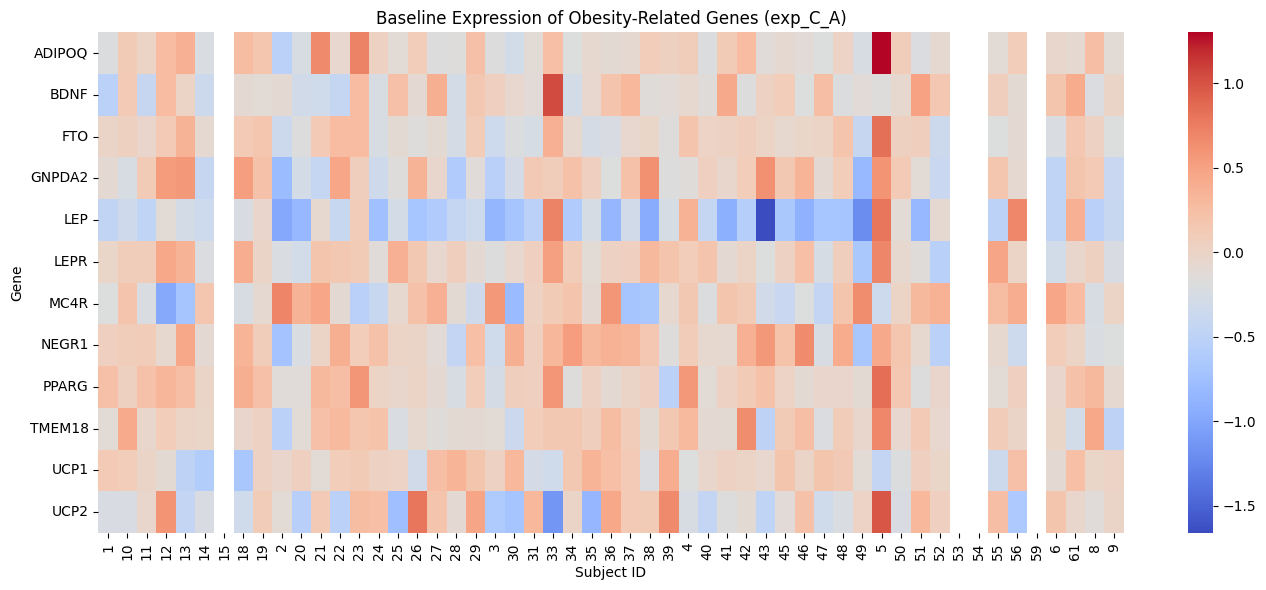

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar=True)
plt.title("Baseline Expression of Obesity-Related Genes (exp_C_A)")
plt.xlabel("Subject ID")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

# 유전자 발현량- 결과지표 간의 피어슨 상관계수 구하기

In [110]:
# 가로축 맞추기: subject_id 기준으로 인덱스 설정
pivot_obesity_genes_expression_change_df_T = pivot_obesity_genes_expression_change_df.T  # shape: (subjects × genes)
obesity_genes_weight_bmi_changes_df.set_index("subject_id", inplace=True)  # shape: (subjects × 12)

# 병합: 유전자 발현량 + 체중/BMI/체지방 변화량
obesity_genes_merged_df = pd.concat([pivot_obesity_genes_expression_change_df_T, obesity_genes_weight_bmi_changes_df], axis=1)

In [17]:
pivot_obesity_genes_expression_change_df_T.shape

(53, 12)

In [16]:
pivot_obesity_genes_expression_change_df_T.head()

gene_symbol,ADIPOQ,BDNF,FTO,GNPDA2,LEP,LEPR,MC4R,NEGR1,PPARG,TMEM18,UCP1,UCP2
subject_id,,,,,,,,,,,,
1,-0.196041,-0.525472,-0.013301,-0.096386,-0.465870,-0.024795,-0.190319,0.059389,0.229769,-0.115466,0.124143,-0.228980
10,0.115678,0.129059,0.041325,-0.248120,-0.338549,0.074902,0.193810,0.084508,0.044412,0.426791,0.091644,-0.232968
11,-0.004271,-0.415120,-0.030540,0.114345,-0.477162,0.081710,-0.220394,0.102649,0.214201,-0.047400,-0.007086,-0.046244
12,0.274725,0.279586,0.121298,0.539321,-0.115722,0.452690,-0.977750,-0.070920,0.330165,0.086889,-0.103062,0.603683
13,0.381785,-0.002045,0.356442,0.561500,-0.292345,0.354884,-0.707449,0.445684,0.249043,0.003735,-0.492953,-0.440636


In [18]:
obesity_genes_weight_bmi_changes_df.shape

(53, 12)

In [19]:
obesity_genes_weight_bmi_changes_df.head()

,weight_kg_C_A,weight_kg_C_B,weight_kg_B_A,bmi_C_A,bmi_C_B,bmi_B_A,fat_C_A,fat_C_B,fat_B_A,pure_fat_C_A,pure_fat_C_B,pure_fat_B_A
subject_id,,,,,,,,,,,,
1,-9.59,-1.37,-8.22,-3.44,-0.49,-2.95,-7.5,-3.4,-4.1,-9.36066,-2.99932,-6.36134
2,-9.97,-0.95,-9.02,-3.70,-0.35,-3.35,-6.2,-2.5,-3.7,-9.05613,-2.18275,-6.87338
3,-9.47,2.13,-11.60,-2.97,0.68,-3.65,-6.4,0.3,-6.7,-8.34544,0.70710,-9.05254
4,-4.91,0.11,-5.02,-2.07,0.05,-2.12,-2.5,-0.2,-2.3,-4.16890,-0.10224,-4.06666
5,-12.65,-0.35,-12.30,-3.95,-0.11,-3.84,-8.9,-1.9,-7.0,-11.63963,-1.68703,-9.95260


In [20]:
obesity_genes_merged_df.shape

(53, 24)

In [21]:
obesity_genes_merged_df.head()

,ADIPOQ,BDNF,FTO,GNPDA2,LEP,LEPR,MC4R,NEGR1,PPARG,TMEM18,...,weight_kg_B_A,bmi_C_A,bmi_C_B,bmi_B_A,fat_C_A,fat_C_B,fat_B_A,pure_fat_C_A,pure_fat_C_B,pure_fat_B_A
subject_id,,,,,,,,,,,,,,,,,,,,,
1,-0.196041,-0.525472,-0.013301,-0.096386,-0.465870,-0.024795,-0.190319,0.059389,0.229769,-0.115466,...,-8.22,-3.44,-0.49,-2.95,-7.5,-3.4,-4.1,-9.36066,-2.99932,-6.36134
10,0.115678,0.129059,0.041325,-0.248120,-0.338549,0.074902,0.193810,0.084508,0.044412,0.426791,...,-9.46,-3.55,-0.35,-3.20,-4.4,-0.2,-4.2,-8.68676,-0.59828,-8.08848
11,-0.004271,-0.415120,-0.030540,0.114345,-0.477162,0.081710,-0.220394,0.102649,0.214201,-0.047400,...,-9.00,-3.00,-0.22,-2.78,-6.5,-2.0,-4.5,-8.44394,-1.87934,-6.56460
12,0.274725,0.279586,0.121298,0.539321,-0.115722,0.452690,-0.977750,-0.070920,0.330165,0.086889,...,-6.11,-1.89,0.36,-2.25,-2.6,1.2,-3.8,-4.61656,1.40112,-6.01768
13,0.381785,-0.002045,0.356442,0.561500,-0.292345,0.354884,-0.707449,0.445684,0.249043,0.003735,...,-11.12,-3.91,-0.01,-3.90,-6.1,-2.0,-4.1,-11.36910,-1.84514,-9.52396


In [111]:
# 유전자와 타겟 변수들 간의 피어슨 상관계수
obesity_genes_corr_matrix = obesity_genes_merged_df.corr(method='pearson')

# 예측 대상 변수만 선택 (세로 = gene, 가로 = target)
# obesity_genes은 비만 유전자 이름 리스트
obesity_genes_corr_matrix_filtered = obesity_genes_corr_matrix.loc[obesity_genes, ["weight_kg_C_A", "bmi_C_A", "fat_C_A", "pure_fat_C_A"]]

In [26]:
obesity_genes_corr_matrix_filtered.shape

(12, 4)

In [25]:
obesity_genes_corr_matrix_filtered.head()

,weight_kg_C_A,bmi_C_A,fat_C_A,pure_fat_C_A
FTO,-0.021700,0.036645,-0.053152,-0.074968
MC4R,0.131907,0.113702,0.036923,0.172043
LEP,0.409345,0.438097,0.320946,0.402097
LEPR,-0.080276,-0.106782,0.068672,0.011440
ADIPOQ,-0.053726,0.003040,-0.026850,-0.027447


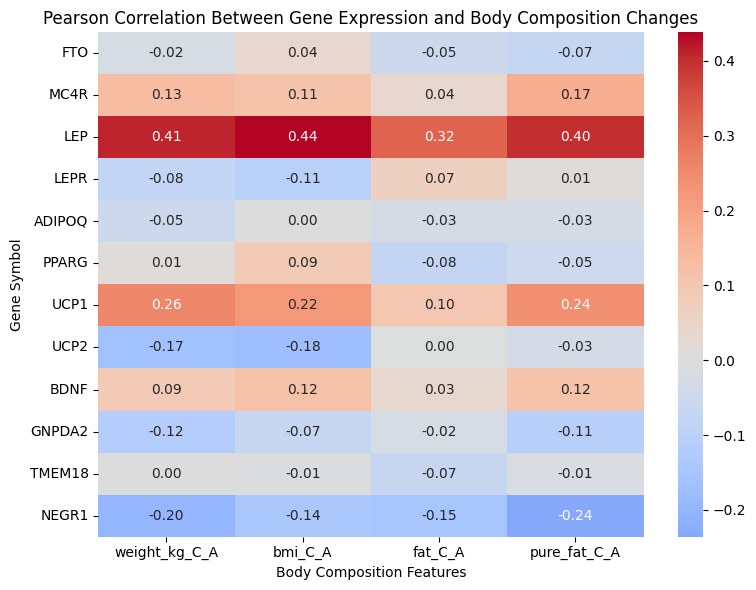

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(obesity_genes_corr_matrix_filtered, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Pearson Correlation Between Gene Expression and Body Composition Changes")
plt.xlabel("Body Composition Features")
plt.ylabel("Gene Symbol")
plt.tight_layout()
plt.show()

# 유전자 발현량- 결과지표 간의 머신러닝 SHAP값 구하기

In [46]:
obesity_genes_merged_df.to_csv("/content/drive/MyDrive/BIO_MEDICAL_PROJECT/obesity_gene_analysis/data/obesity_genes_merged_df.csv",index=True)
# pd.read_csv("your_file.csv", index_col='subject_id')

In [94]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
import shap

각 피실험자의 약 3만개의 유전자 발현량의 평균으로 query_expression SQL 쿼리를 정의해버려서

앞으로 재실험을 할시에 비만유전자 12개* 유전자 발현량 3개=36개의 feature를 X에 넣거나,

이후 SHAP상위 유전자 100개 정도를 추출해서 300개의 feature를 얻게 되는데, 이를 PCA로 차원축소를 하여 모델을 실험하는 것도

결과지표별 R2를 높이는데에 도움이 될 것이라고 생각함

In [90]:
# SQL 쿼리 정의
query_expression = """
SELECT subject_id, exp_C_A, exp_C_B, exp_B_A
FROM expression_change
GROUP BY subject_id
"""

query_metadata = """
SELECT subject_id, treatment, sex, age_yrs, height_cm, weight_kg
FROM metadata
WHERE time_point = 'at study start'
"""

query_weight = "SELECT * FROM weight_bmi_changes"

# 데이터 불러오기 & 병합
conn = sqlite3.connect(db_path)

expression_df = pd.read_sql_query(query_expression, conn, index_col='subject_id')
metadata_df   = pd.read_sql_query(query_metadata, conn, index_col='subject_id')
weight_df     = pd.read_sql_query(query_weight, conn, index_col='subject_id')

conn.close()

pd.read_sql_query()를 사용할 때, SQL 쿼리 결과에서 특정 컬럼을 바로 인덱스로 지정하고 싶다면 index_col 매개변수를 사용하면 됨!

In [75]:
expression_df.shape

(53, 3)

In [76]:
expression_df.columns

Index(['exp_C_A', 'exp_C_B', 'exp_B_A'], dtype='object')

In [72]:
expression_df.head()

,exp_C_A,exp_C_B,exp_B_A
subject_id,,,
1,-0.402629,-0.149945,-0.252684
10,1.087056,-0.241663,1.328719
11,2.775036,0.380748,2.394287
12,0.379739,0.023914,0.355825
13,1.684621,0.319725,1.364896


In [73]:
metadata_df.head()

,treatment,sex,age_yrs,height_cm,weight_kg
subject_id,,,,,
1,very-low-calorie diet,female,46.0,167.0,83.38
2,very-low-calorie diet,female,45.0,164.0,80.94
3,very-low-calorie diet,male,52.0,178.5,99.62
4,very-low-calorie diet,female,41.0,154.0,80.34
5,very-low-calorie diet,male,56.0,179.0,96.67


In [77]:
weight_df.columns

Index(['weight_kg_C_A', 'weight_kg_C_B', 'weight_kg_B_A', 'bmi_C_A', 'bmi_C_B',
       'bmi_B_A', 'fat_C_A', 'fat_C_B', 'fat_B_A', 'pure_fat_C_A',
       'pure_fat_C_B', 'pure_fat_B_A'],
      dtype='object')

In [74]:
weight_df.head()

,weight_kg_C_A,weight_kg_C_B,weight_kg_B_A,bmi_C_A,bmi_C_B,bmi_B_A,fat_C_A,fat_C_B,fat_B_A,pure_fat_C_A,pure_fat_C_B,pure_fat_B_A
subject_id,,,,,,,,,,,,
1,-9.59,-1.37,-8.22,-3.44,-0.49,-2.95,-7.5,-3.4,-4.1,-9.36066,-2.99932,-6.36134
2,-9.97,-0.95,-9.02,-3.70,-0.35,-3.35,-6.2,-2.5,-3.7,-9.05613,-2.18275,-6.87338
3,-9.47,2.13,-11.60,-2.97,0.68,-3.65,-6.4,0.3,-6.7,-8.34544,0.70710,-9.05254
4,-4.91,0.11,-5.02,-2.07,0.05,-2.12,-2.5,-0.2,-2.3,-4.16890,-0.10224,-4.06666
5,-12.65,-0.35,-12.30,-3.95,-0.11,-3.84,-8.9,-1.9,-7.0,-11.63963,-1.68703,-9.95260


In [91]:
 # 똑같은 행을 dropna하여 결측치를 제거하기 위한 데이터프레임 병합
merged_df = (
    expression_df
    .merge(metadata_df, on='subject_id', how='inner')
    .merge(weight_df, on='subject_id', how='inner')
)

# X, y 정의 및 전처리
X_cols = expression_df.columns
y_cols = ['weight_kg_C_A', 'bmi_C_A', 'fat_C_A', 'pure_fat_C_A']  # 원하는 y 값만 추출

df = merged_df.dropna()
df = pd.get_dummies(df, columns=['treatment', 'sex'], drop_first=True)

X = df[X_cols]
y = df[y_cols]

In [92]:
# Train-test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [93]:
# 예측
y_pred = model.predict(X_test)

In [82]:
r2_scores = {}
for i, col in enumerate(y_cols):
    r2_scores[col] = r2_score(y_test[col], y_pred[:, i])

r2_df = pd.DataFrame(list(r2_scores.items()), columns=["Target", "R2_Score"]).sort_values(by="R2_Score", ascending=False)

In [83]:
r2_df

,Target,R2_Score
3,pure_fat_C_A,0.213913
0,weight_kg_C_A,0.080443
1,bmi_C_A,0.070399
2,fat_C_A,0.059889


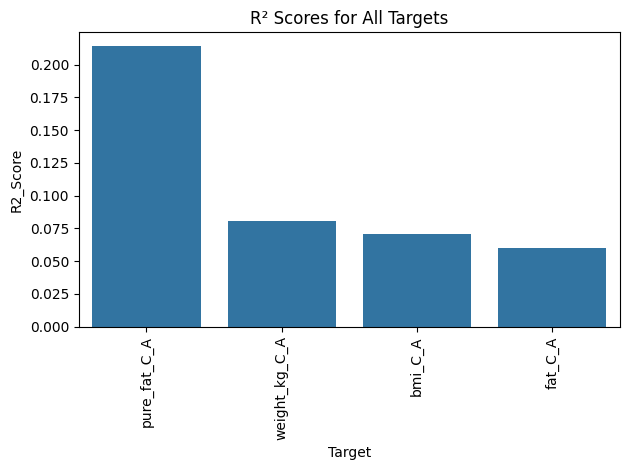

In [84]:
sns.barplot(data=r2_df, x="Target", y="R2_Score")
plt.xticks(rotation=90)
plt.title("R² Scores for All Targets")
plt.tight_layout()
plt.show()

**결과지표 중에서 pure_fat(순수지방량)이 유전자 발현량에 영향을 받는 것으로 확인됨!**

exp_C_A,  exp_B_A, exp_C_B가 어떤 순서로 각 결과지표에 영향을 미치나 시각화한 것인데,

애초에 유전자 발현량이 각 피실험자당 약 3만개의 유전자 발현량의 평균인거니까 부정확함

오히려 반대로 결과지표를 feature로 두고 y를 유전자 발현량으로 두고 **“어떤 결과지표가 유전자 발현량을 가장 잘 설명하는지”**를 SHAP이나 feature importance로 파악할 수O

아래 시각화는 조금 의미가 없는 것


🔍 SHAP Summary for Target: weight_kg_C_A


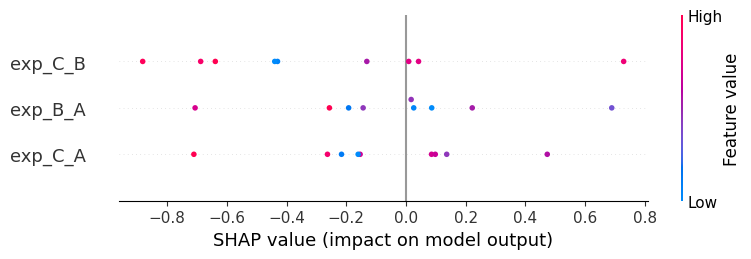

🔍 SHAP Summary for Target: bmi_C_A


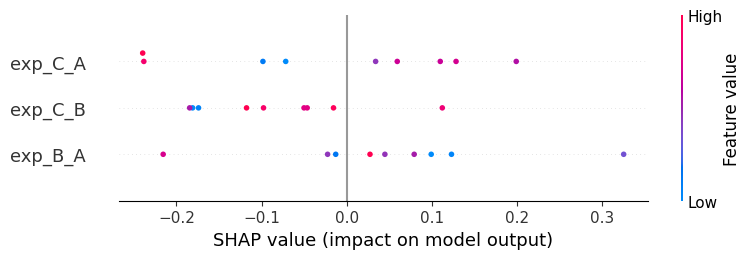

🔍 SHAP Summary for Target: fat_C_A


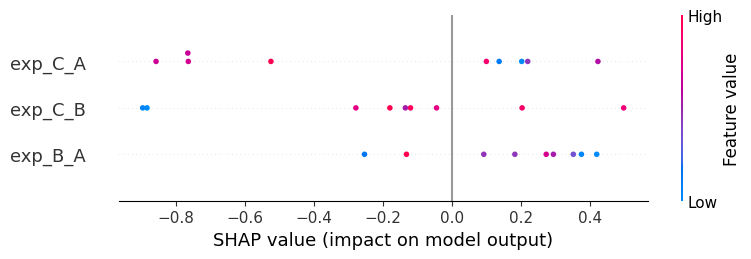

🔍 SHAP Summary for Target: pure_fat_C_A


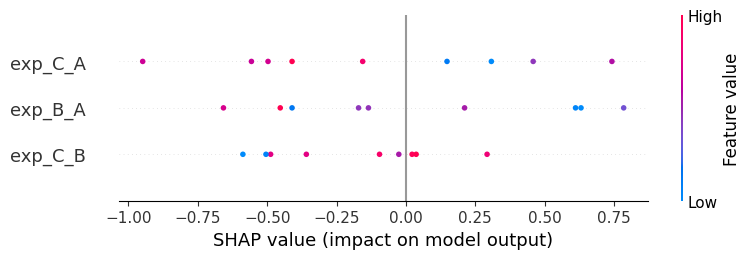

In [98]:
# 타깃 y 컬럼들
target_names = y_train.columns.tolist()

# 각 타깃에 대해 SHAP 해석
for i, target in enumerate(target_names):
    print(f"🔍 SHAP Summary for Target: {target}")

    base_model = model.estimators_[i]  # 각 타깃별 개별 RandomForest
    explainer = shap.TreeExplainer(base_model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test, show=True)

In [ ]:
# 각 타깃 변수별로 따로 SHAP 해석
for i, target in enumerate(y_cols):  # 예: ['weight_kg_C_A', ..., 'pure_fat_C_A']
    print(f"\n🎯 SHAP for target: {target}")
    shap.summary_plot(shap_values[i], X_test, show=True)

In [87]:
X.head()

,exp_C_A,exp_C_B,exp_B_A
subject_id,,,
1,-0.402629,-0.149945,-0.252684
10,1.087056,-0.241663,1.328719
11,2.775036,0.380748,2.394287
12,0.379739,0.023914,0.355825
13,1.684621,0.319725,1.364896


In [99]:
X.shape

(44, 3)

In [100]:
y.shape

(44, 4)

X가 유전자발현량, y가 결과지표였는데 모델에 바꿔서 반대로 넣어서 '어떤 결과지표가 유전자를 가장 잘 설명하는지'확인

In [101]:
# Train-test 분리
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

🔍 SHAP Summary for Target: exp_C_A


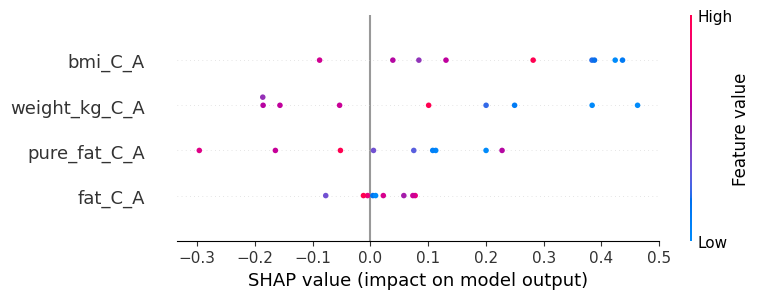

🔍 SHAP Summary for Target: exp_C_B


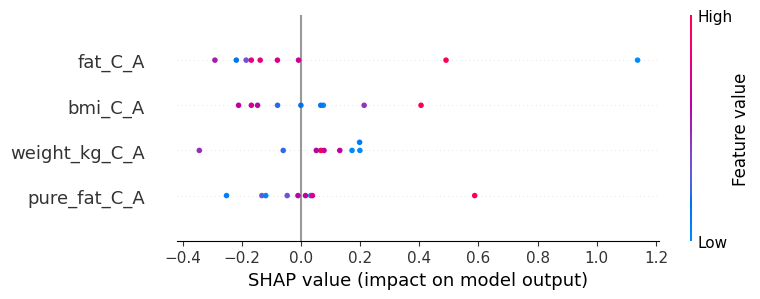

🔍 SHAP Summary for Target: exp_B_A


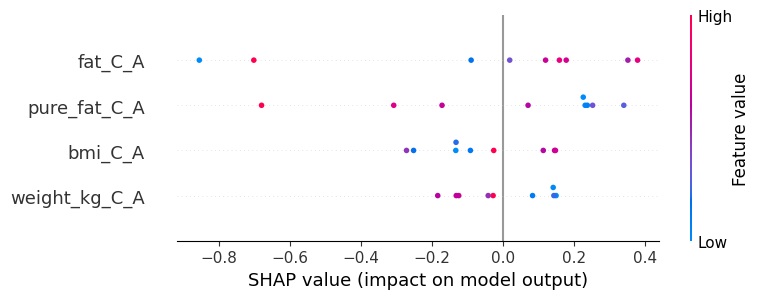

In [102]:
# 타깃 y 컬럼들
target_names = y_train.columns.tolist()

# 각 타깃에 대해 SHAP 해석
for i, target in enumerate(target_names):
    print(f"🔍 SHAP Summary for Target: {target}")

    base_model = model.estimators_[i]  # 각 타깃별 개별 RandomForest
    explainer = shap.TreeExplainer(base_model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test, show=True)

근데 R2랑 달리 SHAP결과는 순수지방량이 유전자 발현량에 가장 영향을 미치는 결과지표가 아님

# **비만 유전자 12개의 발현량- 순수지방량 감소 관계**

In [112]:
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG', 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']
gene_list_sql = ', '.join(f"'{gene}'" for gene in obesity_genes) # 리스트를 SQL용 문자열로 변환

In [115]:
# X 데이터프레임이 될 것
query = f"""
SELECT
    E.subject_id,
    P.gene_symbol AS gene,
    E.exp_C_A
FROM expression_change AS E
JOIN platform AS P ON E.ID_REF = P.ID
WHERE P.gene_symbol IN ({gene_list_sql})
"""

conn = sqlite3.connect(db_path)
obesity_genes_symbols_exp_C_A_df = pd.read_sql_query(query, conn)

In [116]:
obesity_genes_symbols_exp_C_A_df

,subject_id,gene,exp_C_A
0,1,LEPR,-0.024795
1,1,NEGR1,0.059389
2,1,BDNF,-0.525472
3,1,UCP2,-0.228980
4,1,FTO,-0.013301
...,...,...,...
631,61,PPARG,0.221693
632,61,ADIPOQ,-0.082024
633,61,GNPDA2,0.189869
634,61,UCP1,0.246989


In [117]:
# pivot: rows = subject, columns = gene, values = exp_C_A
obesity_genes_symbols_exp_C_A_matrix = obesity_genes_symbols_exp_C_A_df.pivot(index='subject_id', columns='gene', values='exp_C_A')

In [118]:
obesity_genes_symbols_exp_C_A_matrix.head()

gene,ADIPOQ,BDNF,FTO,GNPDA2,LEP,LEPR,MC4R,NEGR1,PPARG,TMEM18,UCP1,UCP2
subject_id,,,,,,,,,,,,
1,-0.196041,-0.525472,-0.013301,-0.096386,-0.465870,-0.024795,-0.190319,0.059389,0.229769,-0.115466,0.124143,-0.228980
10,0.115678,0.129059,0.041325,-0.248120,-0.338549,0.074902,0.193810,0.084508,0.044412,0.426791,0.091644,-0.232968
11,-0.004271,-0.415120,-0.030540,0.114345,-0.477162,0.081710,-0.220394,0.102649,0.214201,-0.047400,-0.007086,-0.046244
12,0.274725,0.279586,0.121298,0.539321,-0.115722,0.452690,-0.977750,-0.070920,0.330165,0.086889,-0.103062,0.603683
13,0.381785,-0.002045,0.356442,0.561500,-0.292345,0.354884,-0.707449,0.445684,0.249043,0.003735,-0.492953,-0.440636


In [119]:
# y 데이터프레임이 될 것
conn = sqlite3.connect(db_path)
pure_fat_C_A_target_df = pd.read_sql_query("""
    SELECT subject_id, pure_fat_C_A
    FROM weight_bmi_changes
""", conn)
conn.close()

In [120]:
pure_fat_C_A_target_df.head()

,subject_id,pure_fat_C_A
0,1,-9.36066
1,2,-9.05613
2,3,-8.34544
3,4,-4.16890
4,5,-11.63963


In [123]:
# dropna를 위해 잠깐 병합
gene_symbol_pure_fat_model_df = obesity_genes_symbols_exp_C_A_matrix.merge(pure_fat_C_A_target_df, on='subject_id', how='inner')
gene_symbol_pure_fat_model_df = gene_symbol_pure_fat_model_df.set_index('subject_id')
gene_symbol_pure_fat_model_df=gene_symbol_pure_fat_model_df.dropna()

In [125]:
gene_symbol_pure_fat_model_df.shape

(47, 13)

In [124]:
gene_symbol_pure_fat_model_df.head()

,ADIPOQ,BDNF,FTO,GNPDA2,LEP,LEPR,MC4R,NEGR1,PPARG,TMEM18,UCP1,UCP2,pure_fat_C_A
subject_id,,,,,,,,,,,,,
1,-0.196041,-0.525472,-0.013301,-0.096386,-0.465870,-0.024795,-0.190319,0.059389,0.229769,-0.115466,0.124143,-0.228980,-9.36066
10,0.115678,0.129059,0.041325,-0.248120,-0.338549,0.074902,0.193810,0.084508,0.044412,0.426791,0.091644,-0.232968,-8.68676
11,-0.004271,-0.415120,-0.030540,0.114345,-0.477162,0.081710,-0.220394,0.102649,0.214201,-0.047400,-0.007086,-0.046244,-8.44394
12,0.274725,0.279586,0.121298,0.539321,-0.115722,0.452690,-0.977750,-0.070920,0.330165,0.086889,-0.103062,0.603683,-4.61656
13,0.381785,-0.002045,0.356442,0.561500,-0.292345,0.354884,-0.707449,0.445684,0.249043,0.003735,-0.492953,-0.440636,-11.36910


In [127]:
# X, y 다시 분리
X = gene_symbol_pure_fat_model_df.drop(columns='pure_fat_C_A')
y = gene_symbol_pure_fat_model_df['pure_fat_C_A']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. RandomForestRegressor

In [131]:
RandomForestRegressor_model = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForestRegressor_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

R² score: 0.7939083295006505


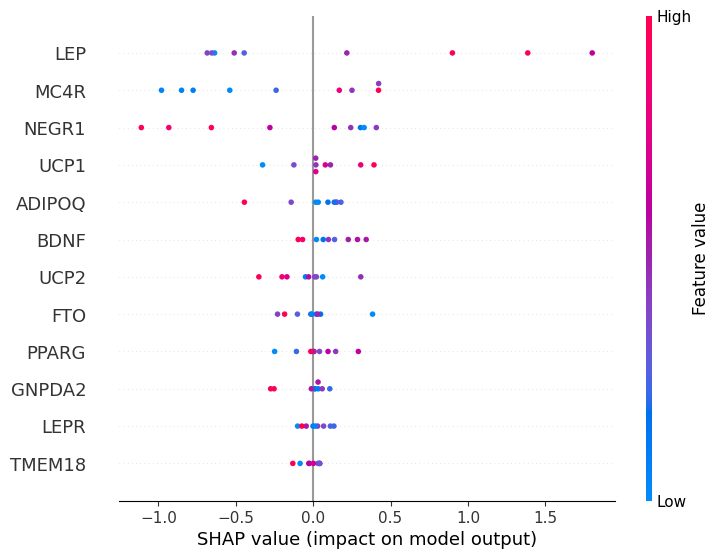

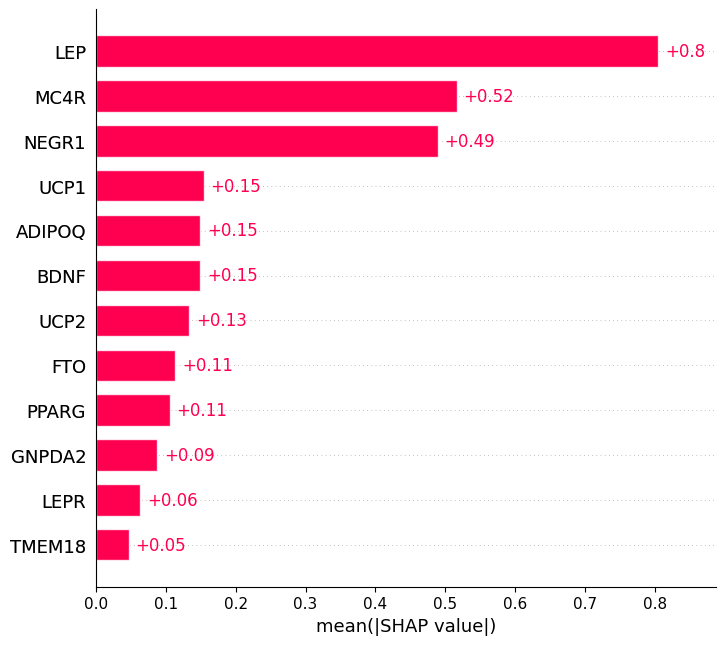

In [146]:
# 예측 및 성능 확인
y_pred = RandomForestRegressor_model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

# SHAP 값 계산
explainer = shap.Explainer(RandomForestRegressor_model)
shap_values = explainer(X_test)

# SHAP 시각화
shap.plots.beeswarm(shap_values, max_display=12)  # 중요도 순 전체
shap.plots.bar(shap_values, max_display=12)       # 평균 절대값 기준 top

2. XGBRegressor

In [132]:
!pip install xgboost

In [134]:
import xgboost as xgb
XGBRegressor_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
XGBRegressor_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

R² score: 0.925180146781381


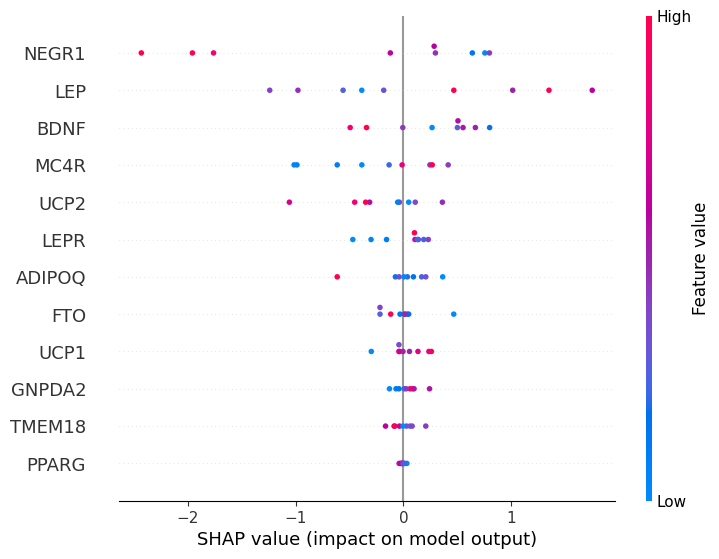

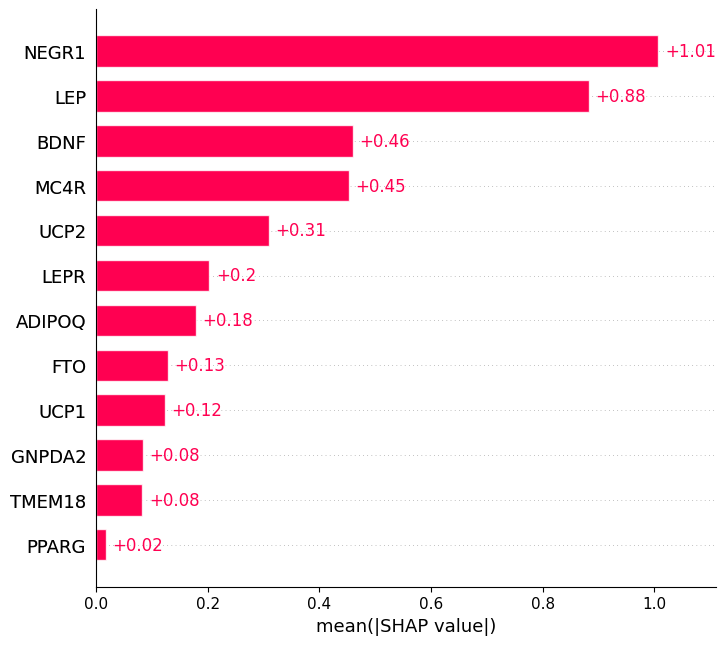

In [147]:
# 예측 및 성능 확인
y_pred = XGBRegressor_model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

# SHAP 값 계산
explainer = shap.Explainer(XGBRegressor_model)
shap_values = explainer(X_test)

# SHAP 시각화
shap.plots.beeswarm(shap_values, max_display=12)  # 중요도 순 전체
shap.plots.bar(shap_values, max_display=12)       # 평균 절대값 기준 top

3. XGBRegressor+ K-Fold

In [136]:
from sklearn.model_selection import GroupKFold

XGBRegressor_KFold_model= xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
gkf = GroupKFold(n_splits=5)

In [152]:
r2_list = []
shap_all_values = None # 첫 번째 fold의 SHAP 값을 저장할 변수
groups=gene_symbol_pure_fat_model_df.index

# ✅ 교차검증 시작
for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups=groups)):
    print(f"\n📂 Fold {fold+1}")

    # 학습/테스트 세트 분할
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 모델 학습
    XGBRegressor_KFold_model.fit(X_train, y_train)

    # 예측 및 R² 계산
    y_pred = XGBRegressor_KFold_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)
    print("R²:", round(r2, 4))

    # 첫 번째 fold에 대해서만 SHAP 계산
    if fold == 4:
        explainer = shap.Explainer(XGBRegressor_KFold_model)
        shap_all_values = explainer(X_test)


📂 Fold 1
R²: -2.1565

📂 Fold 2
R²: -1.965

📂 Fold 3
R²: 0.2266

📂 Fold 4
R²: -2.8715

📂 Fold 5
R²: 0.4125



📊 평균 R²: -1.2708


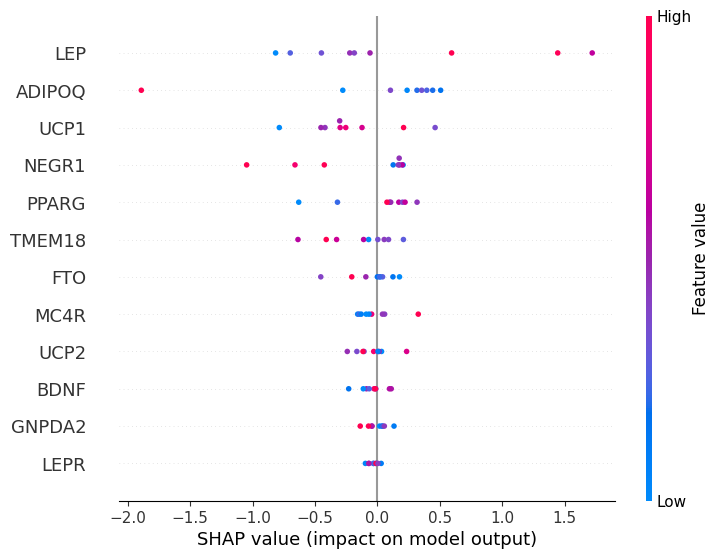

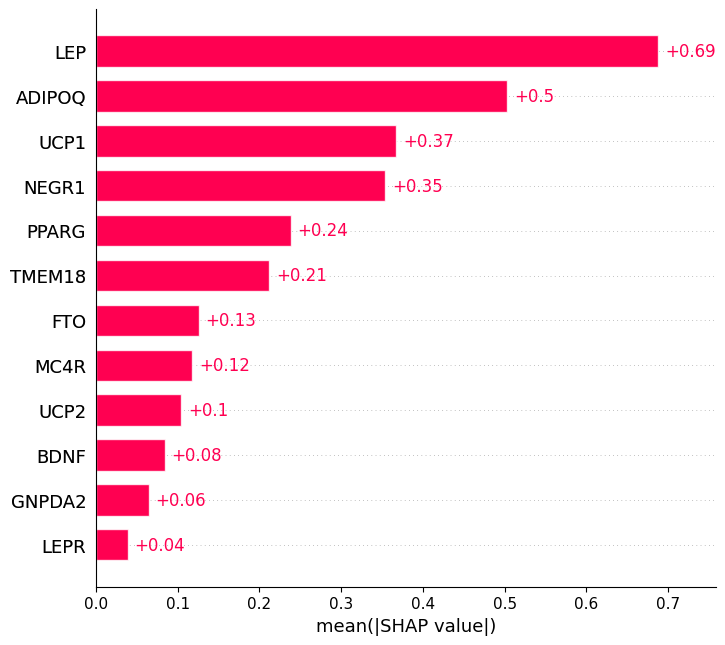

In [153]:
import numpy as np

# 평균 R² 출력
print(f"\n📊 평균 R²: {np.mean(r2_list):.4f}")

# SHAP 시각화
if shap_all_values is not None:
    shap.plots.beeswarm(shap_all_values, max_display=12)
    shap.plots.bar(shap_all_values, max_display=12)
else:
    print("⚠️ SHAP 값이 저장되지 않았습니다.")